## Clasificacion binaria

Predecir la columna quality

* legit: 0
* Fraud: 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
df =pd.read_csv('../../data/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:

df.shape

(6497, 13)

In [5]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [6]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

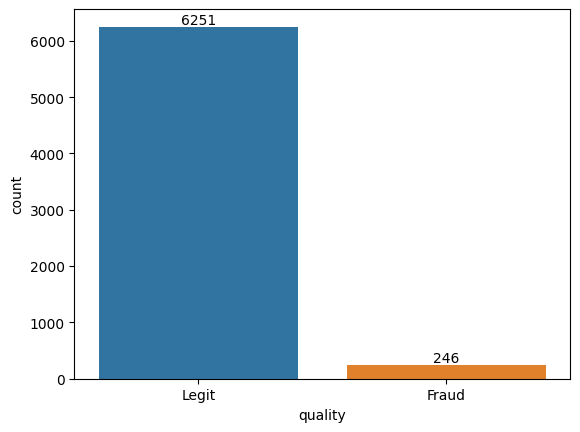

In [7]:
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0]);

<Axes: xlabel='quality', ylabel='alcohol'>

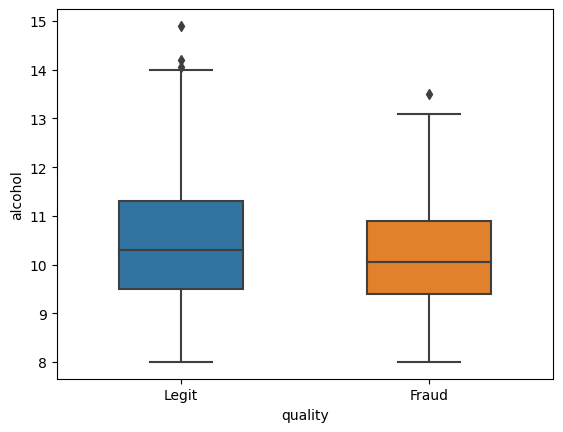

In [8]:
sns.boxplot(data=df, x='quality', y='alcohol', width=0.5)

In [34]:
df['fraud'] = df['quality'].map({
    'Fraud': 1,
    'Legit': 0
})
df.drop('quality', axis=1, inplace=True)
# NOTA: drop_first permite eliminar la primera columna que se genera para evitar
# correlación entre las propias columnas de entrada
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


<Axes: >

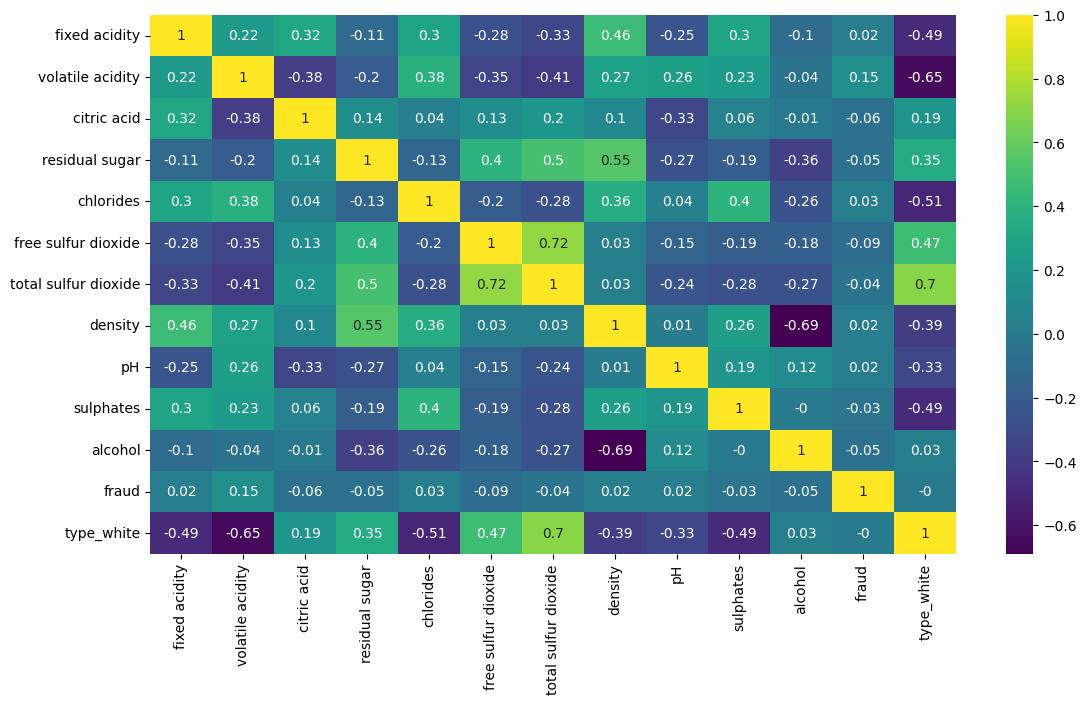

In [37]:
plt.figure(figsize=(13,7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True)

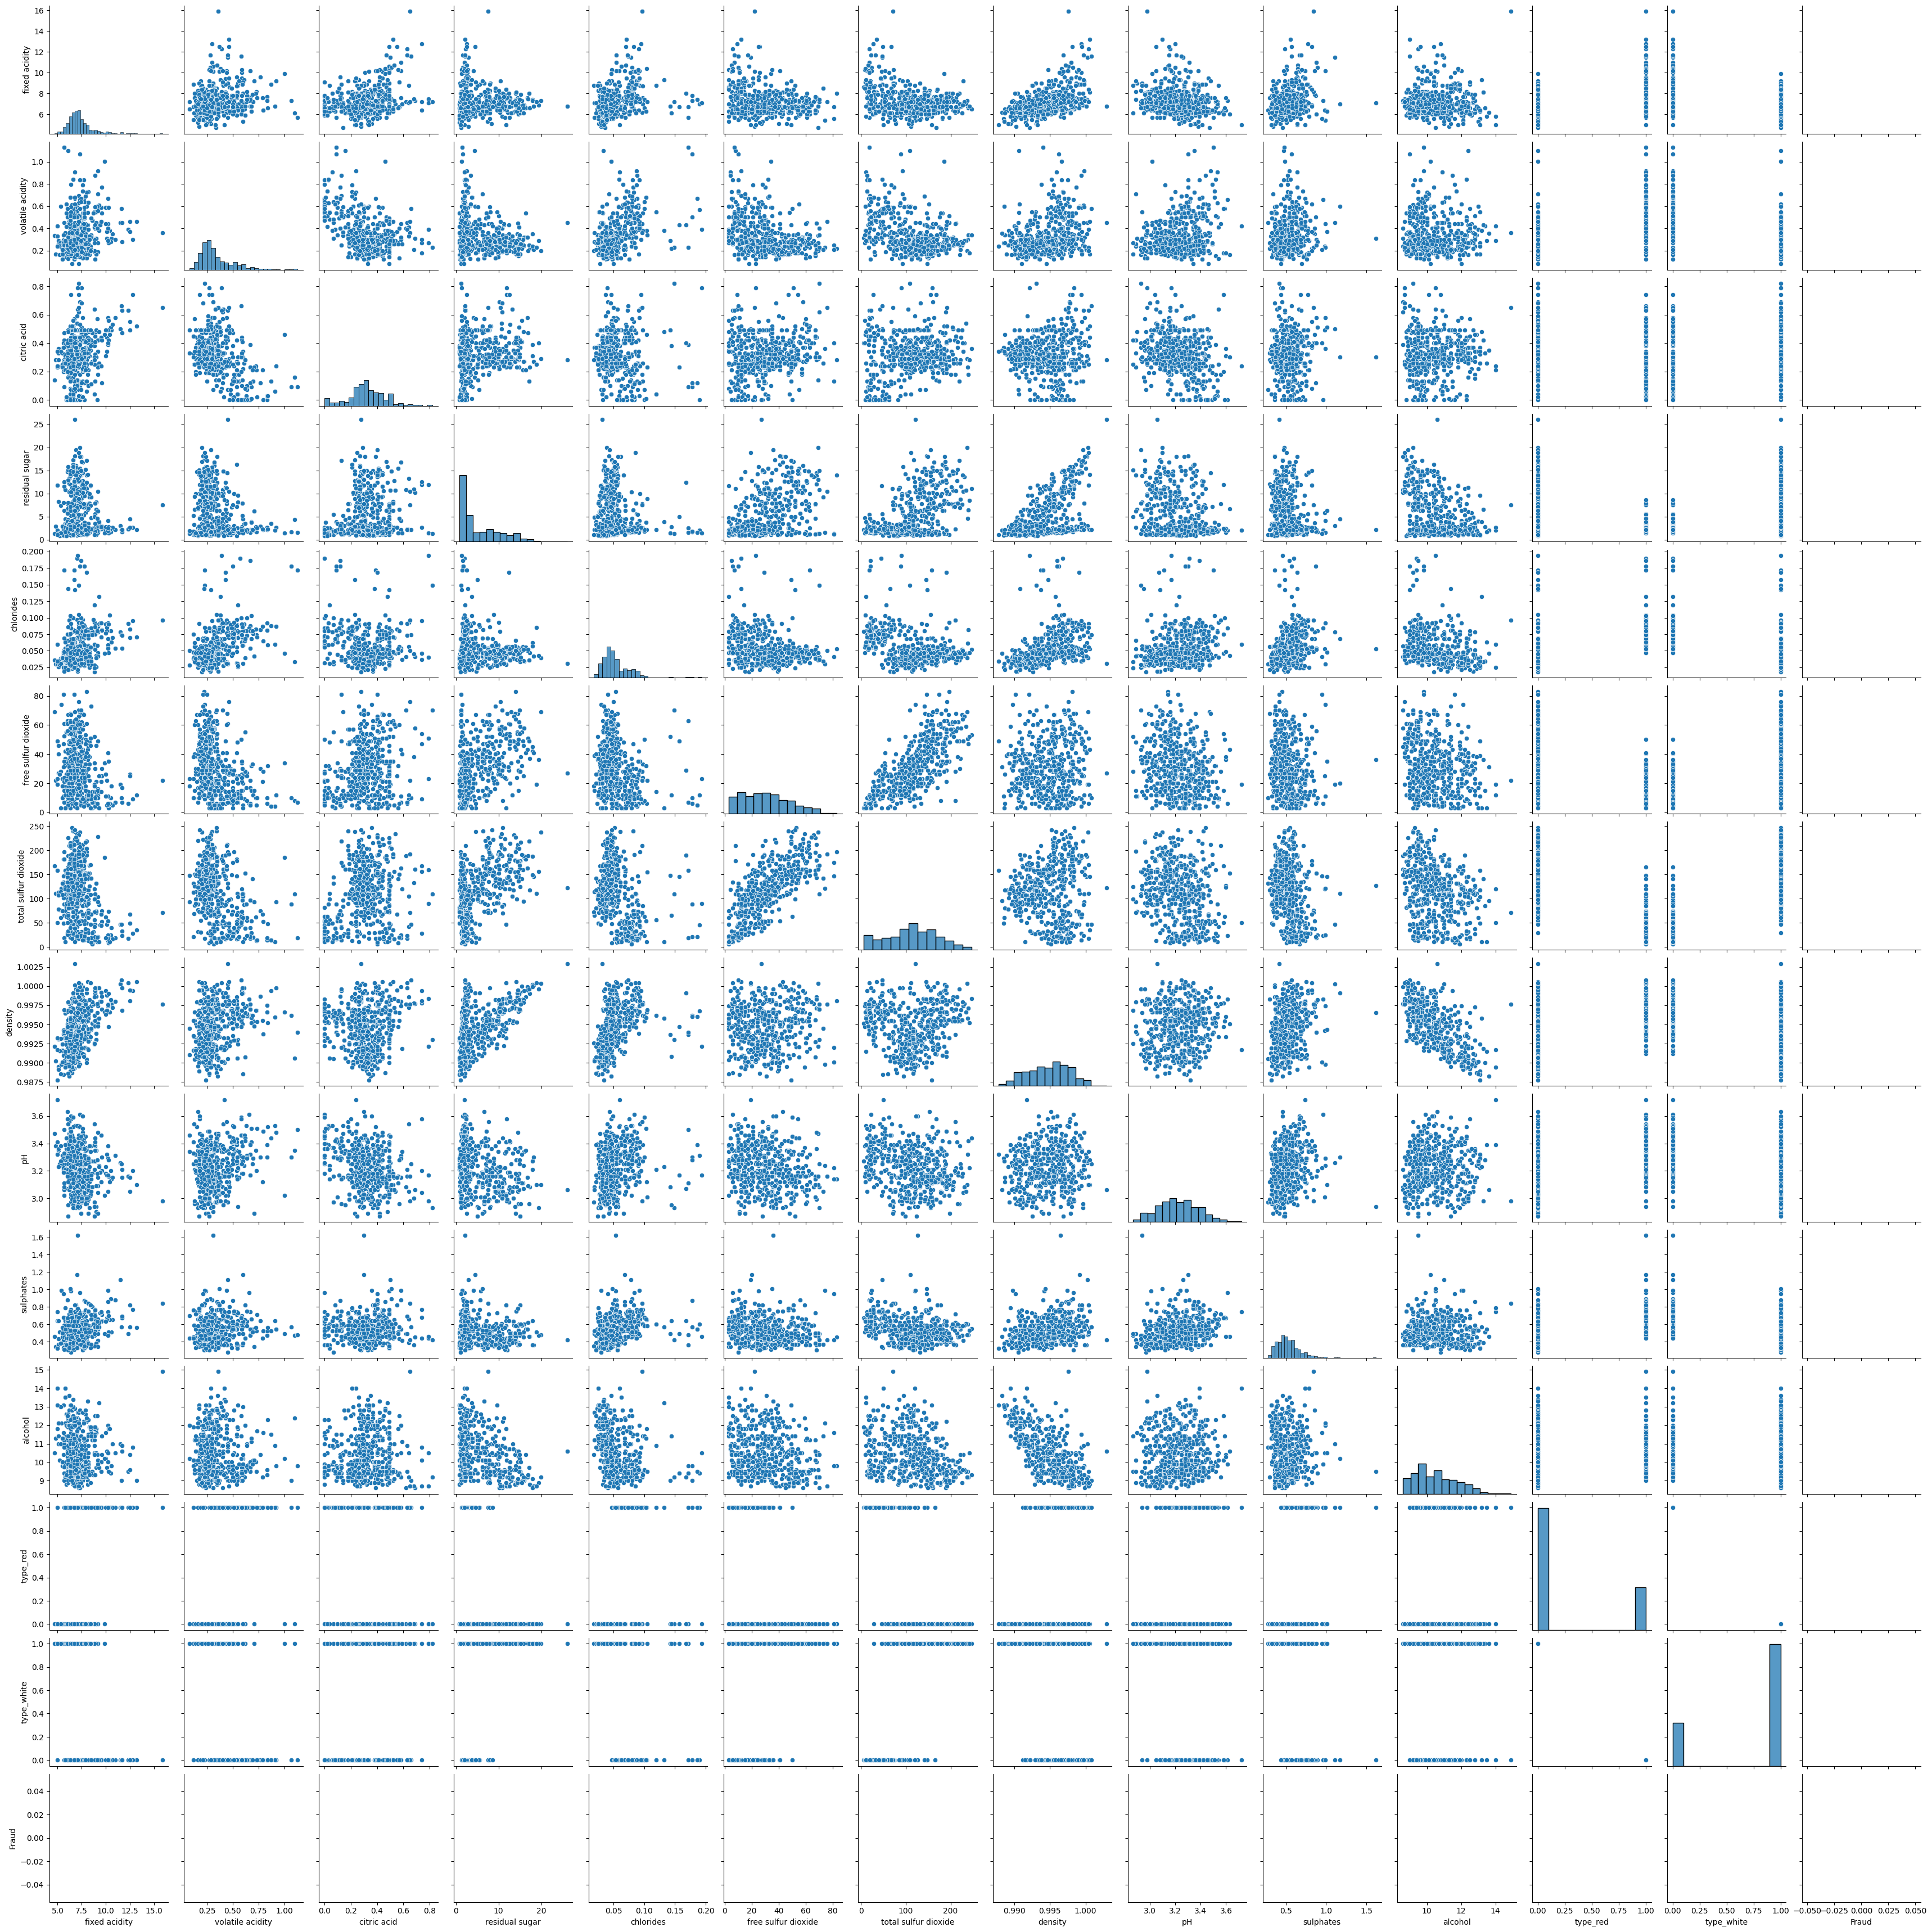

In [12]:
sns.pairplot(df.sample(500))

<Axes: xlabel='volatile acidity', ylabel='free sulfur dioxide'>

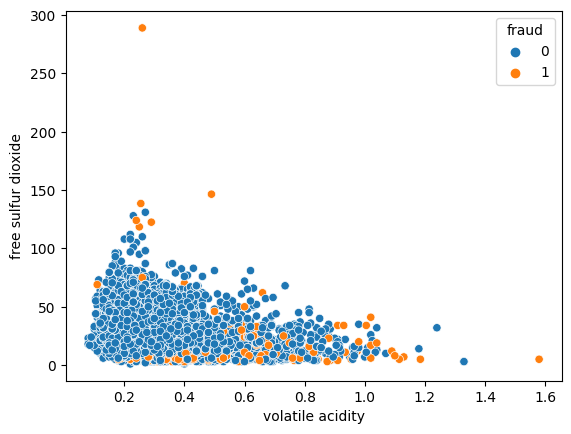

In [40]:
sns.scatterplot(data=df, x='volatile acidity', y='free sulfur dioxide', hue='fraud')

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,-0.486740,NaN
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,-0.653036,NaN
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,0.187397,NaN
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,0.348821,NaN
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,-0.512678,NaN
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,0.471644,NaN
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,0.700357,NaN
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,-0.390645,NaN
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,-0.329129,NaN
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,-0.487218,NaN


<Axes: xlabel='fraud', ylabel='alcohol'>

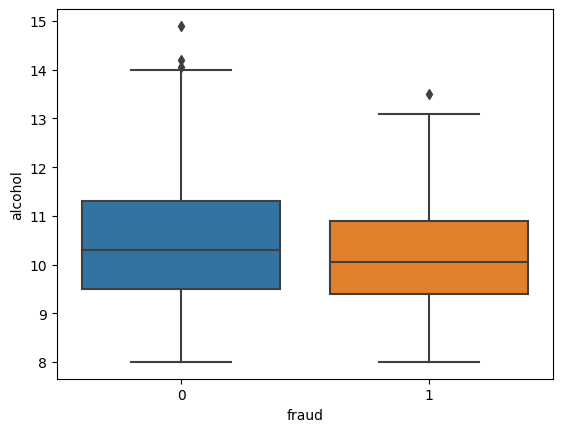

In [43]:
sns.boxplot(data=df, x='fraud', y='alcohol')

<Axes: xlabel='fraud', ylabel='alcohol'>

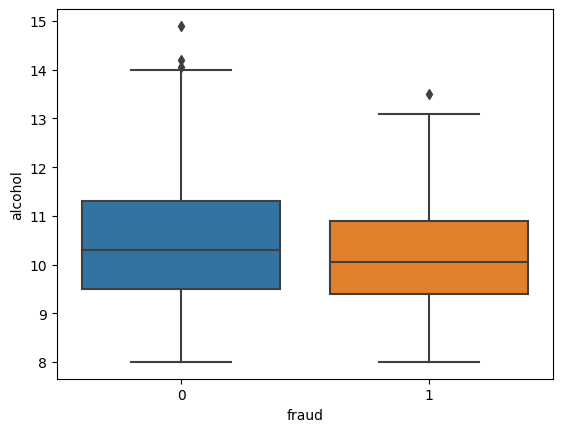

In [44]:
sns.boxplot(data=df, x='fraud', y='alcohol')

<Axes: xlabel='Fraud', ylabel='volatile acidity'>

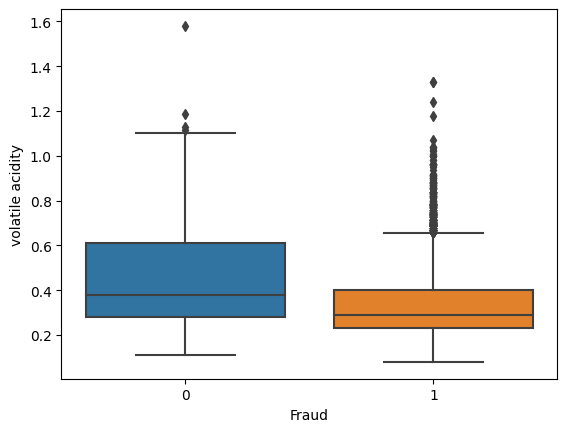

In [ ]:
sns.boxplot(data=df, x='fraud', y='volatile acidity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'free sulfur dioxide'),
  Text(1, 0, 'citric acid'),
  Text(2, 0, 'alcohol'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'total sulfur dioxide'),
  Text(5, 0, 'sulphates'),
  Text(6, 0, 'type_white'),
  Text(7, 0, 'type_red'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'fixed acidity'),
  Text(11, 0, 'chlorides'),
  Text(12, 0, 'volatile acidity')])

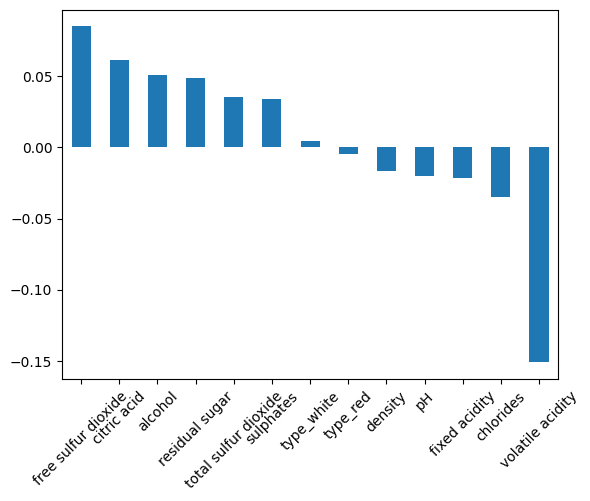

In [ ]:
df.corr(numeric_only=True)['fraud'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.xticks(rotation=45)

(0.0, 1.25)

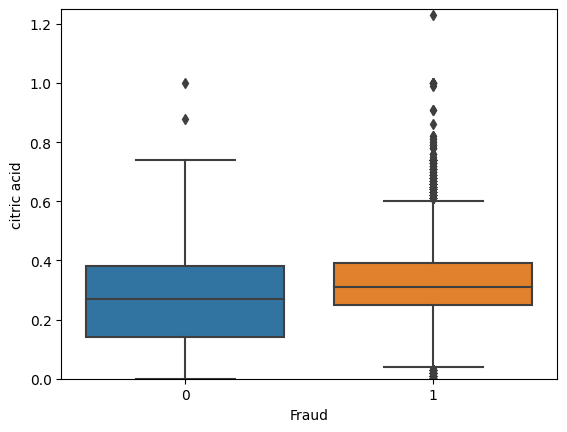

In [ ]:
sns.boxplot(data=df, x='fraud', y='citric acid')
plt.ylim(0,1.25)

<Axes: xlabel='volatile acidity', ylabel='chlorides'>

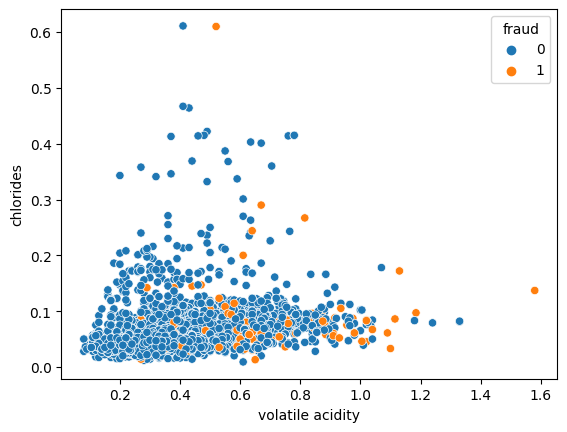

In [46]:
sns.scatterplot(data=df, x='volatile acidity', y='chlorides', hue='fraud')

## Particionamiento

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud,type_red,type_white
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,1,0


In [59]:
X = df.drop('fraud', axis=1)
y= df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [60]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


## Regresion Logistica

In [61]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=  LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       0.00      0.00      0.00        25

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

## Balancear clases
https://imbalanced-learn.org/stable/index.html

pip install imbalanced-learn en la consola de comandos

In [57]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [63]:
print(f'original:{X_train.shape}{y_train.shape}')
print(f'resampled:{X_train_res.shape}{y_train_res.shape}')

original:(5847, 12)(5847,)
resampled:(11252, 12)(11252,)


### EDAs

In [64]:
y_train_res.value_counts()

0    5626
1    5626
Name: fraud, dtype: int64

In [ ]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=  LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       0.00      0.00      0.00        25

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

In [ ]:
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=  LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       0.00      0.00      0.00        25

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\erodr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

In [65]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       625
           1       0.09      0.72      0.17        25

    accuracy                           0.72       650
   macro avg       0.54      0.72      0.50       650
weighted avg       0.95      0.72      0.81       650



## KNN

In [70]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       625
           1       0.11      0.56      0.19        25

    accuracy                           0.81       650
   macro avg       0.55      0.69      0.54       650
weighted avg       0.95      0.81      0.87       650



## SVN:
https://greitemann.dev/svm-demo

In [69]:
from sklearn.svm import SVC

# model = SVC()
model = SVC(C=1)
# una menor C intentara tener un margen de separacion ma amplio de lo que pueda cpometer mas error pero generelalizar mejor
# Una C mayor intentara sera en un margen de separacion  mas estrecho intentando clasificar todos los puntos, no generaliza
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       625
           1       0.07      0.60      0.13        25

    accuracy                           0.68       650
   macro avg       0.52      0.64      0.47       650
weighted avg       0.94      0.68      0.78       650

